<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/%EC%84%A0%ED%98%95%EB%B6%84%EC%84%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 생성하기

def make_data(size, distance, density):
  X = np.linspace(0,1,size) + density * np.random.normal(size = size) + distance
  Y = np.linspace(0,1,size) + density * np.random.normal(size = size) + distance

  return X, Y

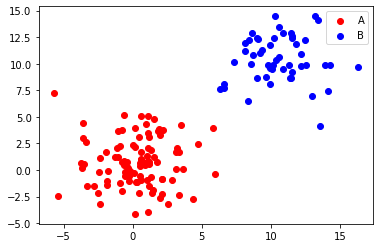

In [3]:
X1, Y1 = make_data(100, 0, 2)
X2, Y2 = make_data(50, 10, 2)

plt.scatter(X1, Y1, color = 'red', label = "A")
plt.scatter(X2, Y2, color = 'blue', label = "B")
plt.legend()
plt.show()

In [4]:
# 평균벡터 계산

mu_A = np.matrix([X1.mean(), Y1.mean()])
mu_B = np.matrix([X2.mean(), Y2.mean()])  # array로 하면 나중에 계산이 안된다!

# 분산 행렬 계산
S_W = np.matrix('0 0; 0 0', dtype = float) 

for k in range(len(X1)):
  vec = np.matrix([X1[k], Y1[k]]) - mu_A
  S_W += np.matmul(vec.T, vec) # np.matmul: 행렬곱 함수 /  np.matmul(a, b) 식으로 두 개의 배열을 차례대로 input으로 넣어주거나, a @ b 처럼 @ 기호를 이용하여 간소화

for k in range(len(X2)):
  vec = np.matrix([X2[k], Y2[k]]) - mu_B
  S_W += np.matmul(vec.T, vec)

# w벡터 구하기
w = np.matmul(np.linalg.inv(S_W), (mu_A - mu_B).T) # np.linalg.inv(): 주어진 행렬의 역을 계산
w

matrix([[-0.01466039],
        [-0.01306288]])

In [8]:
w[0,0] # 0행, 0열

-0.014660385342126358

In [9]:
w[1,0] # 1행, 0열

-0.01306287917054569

In [5]:
a = np.matrix('0 0; 0 0', dtype=float)
a

matrix([[0., 0.],
        [0., 0.]])

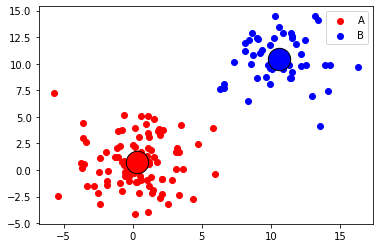

In [6]:
plt.scatter(X1, Y1, color = 'red', label = "A")
plt.scatter(X2, Y2, color = 'blue', label = "B")

plt.scatter(X1.mean(), Y1.mean(), color='red', s = 500, edgecolors = 'k') # s: 마커의 크기 / 'k': 검은색
plt.scatter(X2.mean(), Y2.mean(), color='blue', s = 500, edgecolors = 'k')


plt.legend()
plt.show()

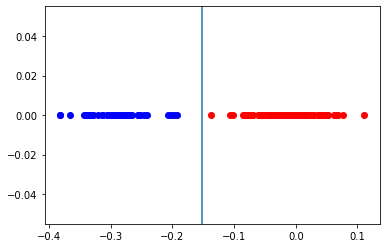

In [7]:
# projection 시켜보기

X1_p = []
X2_p = []

for k in range(len(X1)):
  X1_p.append(np.matmul(np.matrix([X1[k], Y1[k]]), w)[0,0])

for k in range(len(X2)):
  X2_p.append(np.matmul(np.matrix([X2[k], Y2[k]]), w)[0,0])


plt.scatter(X1_p, [0]*len(X1_p), color = 'red')
plt.scatter(X2_p, [0]*len(X2_p), color = 'blue')
plt.axvline(x = np.array(X1_p).mean()/2 + np.array(X2_p).mean()/2) # plt.axvline: 수직선 / plt.axhline: 수평선

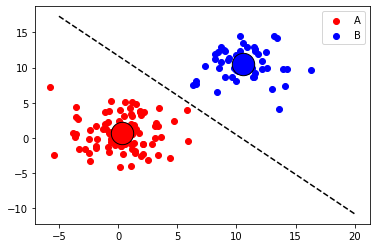

In [10]:
M = (mu_A + mu_B) / 2

x = np.linspace(-5, 20, 1001)
y = -w[0,0]/w[1,0] * (x - M[0,0]) + M[0,1]




plt.scatter(X1, Y1, color = 'red', label = "A")
plt.scatter(X2, Y2, color = 'blue', label = "B")
plt.plot(x,y, 'k--')  #decision boundary(결정 경계)
plt.scatter(X1.mean(), Y1.mean(), color='red', s = 500, edgecolors = 'k')
plt.scatter(X2.mean(), Y2.mean(), color='blue', s = 500, edgecolors = 'k')


plt.legend()
plt.show()

data is in B


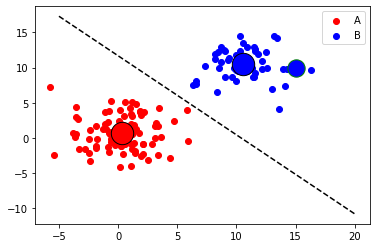

In [11]:
# 판별기를 만들어 보자!

data = np.matrix([15,10])
decision_boundary = np.array(X1_p).mean()/2 + np.array(X2_p).mean()/2

if np.matmul(data, w)[0,0] > decision_boundary:
  print('data is in A')
  color = 'red'
else: 
  print('data is in B')
  color = 'blue'

plt.scatter(X1, Y1, color = 'red', label = "A")
plt.scatter(X2, Y2, color = 'blue', label = "B")
plt.scatter(data[0,0], data[0,1], color = color, edgecolors = 'green', s = 300)
plt.plot(x,y, 'k--')  #decision boundary
plt.scatter(X1.mean(), Y1.mean(), color='red', s = 500, edgecolors = 'k')
plt.scatter(X2.mean(), Y2.mean(), color='blue', s = 500, edgecolors = 'k')


plt.legend()
plt.show()

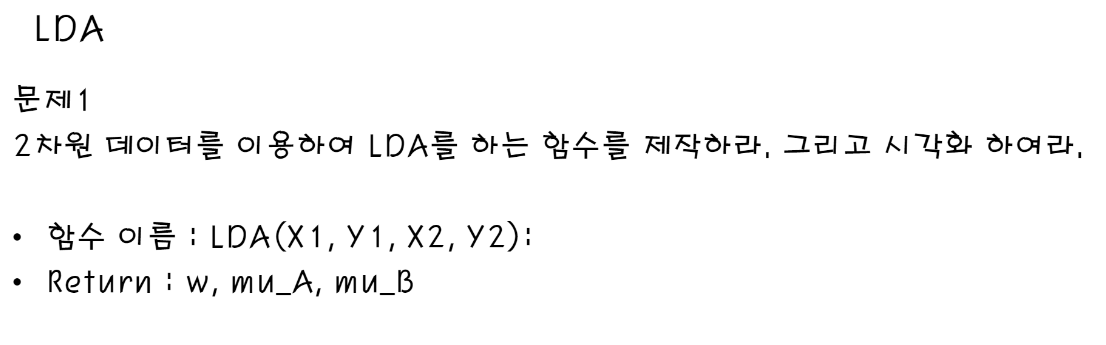

In [12]:
def LDA(X1, Y1, X2, Y2):
  mu_A = np.matrix([X1.mean(), Y1.mean()])
  mu_B = np.matrix([X2.mean(), Y2.mean()])  # array로 하면 나중에 계산이 안된다!

  # 분산 행렬 계산
  S_W = np.matrix('0 0; 0 0', dtype = float) 

  for k in range(len(X1)):
    vec = np.matrix([X1[k], Y1[k]]) - mu_A
    S_W += np.matmul(vec.T, vec)

  for k in range(len(X2)):
    vec = np.matrix([X2[k], Y2[k]]) - mu_B
    S_W += np.matmul(vec.T, vec)

  # w벡터 구하기
  w = np.matmul(np.linalg.inv(S_W), (mu_A - mu_B).T)
  

  return w, mu_A, mu_B

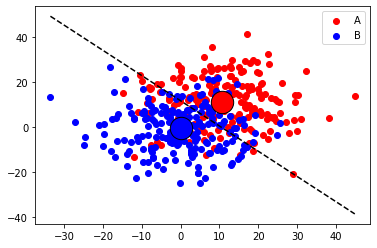

In [13]:
X1, Y1 = make_data(200, 10, 10)
X2, Y2 = make_data(200, 0, 10)

LDA(X1, Y1, X2, Y2)

# 시각화
M = (mu_A + mu_B) / 2

x = np.linspace(min(min(X1), min(X2)), max(max(X1), max(X2)), 1001)
y = -w[0,0]/w[1,0] * (x - M[0,0]) + M[0,1]


plt.scatter(X1, Y1, color = 'red', label = "A")
plt.scatter(X2, Y2, color = 'blue', label = "B")
plt.plot(x,y, 'k--')  #decision boundary
plt.scatter(X1.mean(), Y1.mean(), color='red', s = 500, edgecolors = 'k')
plt.scatter(X2.mean(), Y2.mean(), color='blue', s = 500, edgecolors = 'k')


plt.legend()
plt.show()

In [14]:
iris = pd.read_csv("/content/iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [15]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

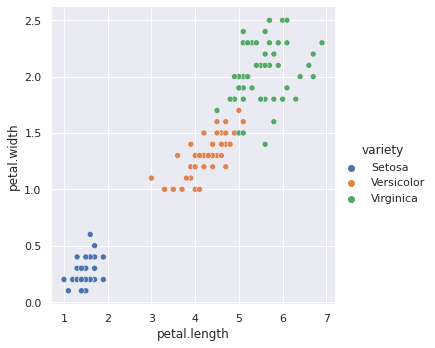

In [18]:
sns.set(style = 'darkgrid')
sns.relplot(x = "petal.length", y = 'petal.width', data = iris,
           hue = 'variety')
plt.show()

In [19]:
Setosa = iris[iris['variety'] == 'Setosa']
Versicolor = iris[iris['variety'] == 'Versicolor']

X1 = np.array(Setosa['petal.length'])
Y1 = np.array(Setosa['petal.width'])

X2 = np.array(Versicolor['petal.length'])
Y2 = np.array(Versicolor['petal.width'])

w, mu_A, mu_B = LDA(X1, Y1, X2, Y2)

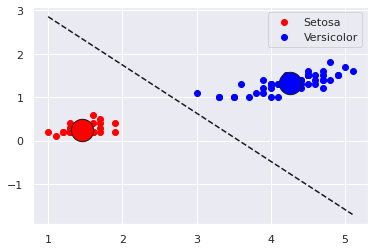

In [20]:
# 시각화
M = (mu_A + mu_B) / 2

x = np.linspace(min(min(X1), min(X2)), max(max(X1), max(X2)), 1001)
y = -w[0,0]/w[1,0] * (x - M[0,0]) + M[0,1]


plt.scatter(X1, Y1, color = 'red', label = "Setosa")
plt.scatter(X2, Y2, color = 'blue', label = "Versicolor")
plt.plot(x,y, 'k--')  #decision boundary
plt.scatter(X1.mean(), Y1.mean(), color='red', s = 500, edgecolors = 'k')
plt.scatter(X2.mean(), Y2.mean(), color='blue', s = 500, edgecolors = 'k')


plt.legend()
plt.show()

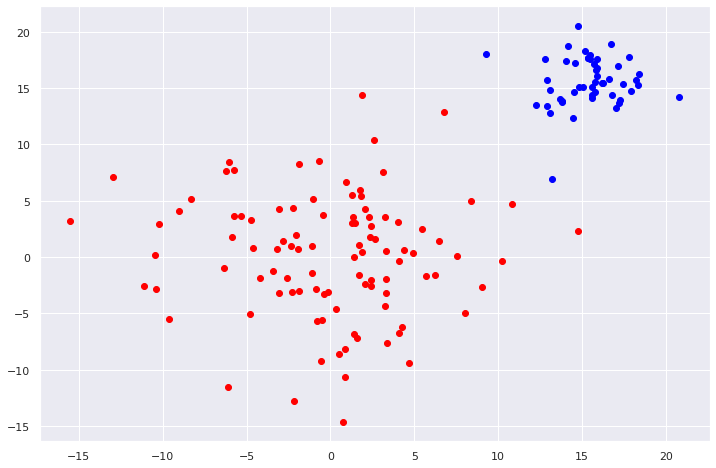

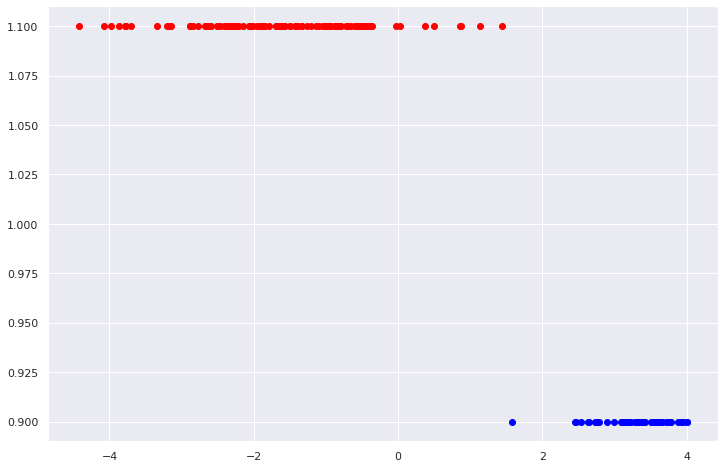

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

X1, Y1 = make_data(100, 0, 5)
X2, Y2 = make_data(50, 15, 2)

df_1 = pd.DataFrame([X1,Y1]).T
df_2 = pd.DataFrame([X2,Y2]).T

df_1["group"] = "A"
df_2["group"] = "B"

df = pd.concat([df_1,df_2])
df.reset_index(inplace = True, drop = True)
df.columns = ["X","Y","group"]

df_data = df[["X","Y"]]
df_target = df["group"]

# df_scaled = StandardScaler().fit_transform(df_data)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(df_data, df_target)

# data_lda = lda.transform(df_scaled)
data_lda = lda.transform(df_data)

# lda_columns=['lda_component_1','lda_component_2']
lda_columns=['lda_component_1']

df_lda = pd.DataFrame(data_lda,columns = lda_columns)
df_lda['target'] = df_target

df_lda_A = df_lda[df_lda['target'] == "A"]
df_lda_B = df_lda[df_lda['target'] == "B"]

fig = plt.figure(figsize = (12,8))
plt.scatter(X1, Y1, color = 'red')
plt.scatter(X2, Y2, color = 'blue')
plt.show()

fig = plt.figure(figsize = (12,8))
plt.scatter(df_lda_A.iloc[:,0], [1.1]*len(df_lda_A), color = 'red')
plt.scatter(df_lda_B.iloc[:,0], [0.9]*len(df_lda_B), color = 'blue')
plt.show()


# x = np.linspace(-15,20,1001)
# y = (-lda.intercept_ - lda.coef_[0][0]*x)/lda.coef_[0][1]

# fig = plt.figure(figsize = (12,8))
# plt.plot(x,y)
# plt.scatter(X1, Y1, color = 'red')
# plt.scatter(X2, Y2, color = 'blue')
# plt.show()

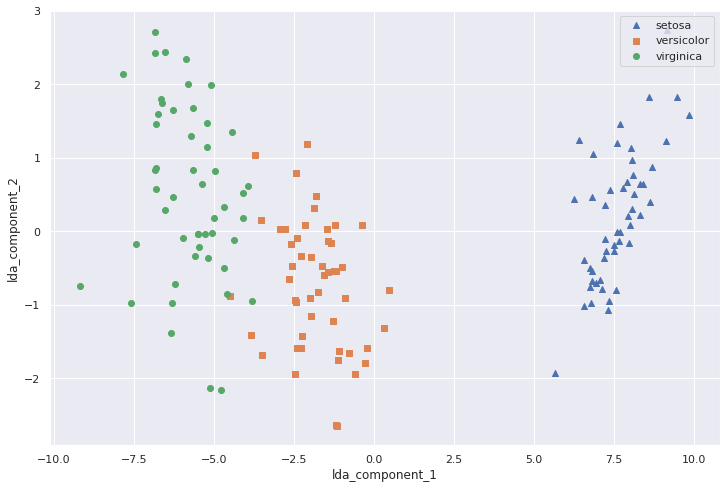

In [22]:
# 3개를 다 한꺼번에 구분하는것도 가능할까?

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

fig = plt.figure(figsize = (12,8))
#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()